In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
{"username":"karamarora","key":"fcb19a761620da28c2f4d6036416e24b"}
od.download("https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: karamarora
Your Kaggle Key: ··········


100%|██████████| 34.1M/34.1M [00:00<00:00, 41.6MB/s]


In [ ]:
import os
os.chdir('./alzheimers-dataset-4-class-of-images')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

# from Models.dataset import load_train_data, load_test_data


In [ ]:
def load_train_data(img_size):
    """
    This function loads a dataset of images from a specified path, resizes the images,
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented',
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class,
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_train (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """

    df_train=[] # create a dictionary to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    train_path=''

    for i in classes:
        if i=='MildDemented':
            train_path='Alzheimer_s Dataset/train/MildDemented/mildDem'
        elif i=='ModerateDemented':
            train_path='Alzheimer_s Dataset/train/ModerateDemented/moderateDem'
        elif i=='NonDemented':
            train_path='Alzheimer_s Dataset/train/NonDemented/nonDem'
        else:
            train_path='Alzheimer_s Dataset/train/VeryMildDemented/verymildDem'
        for j in range(100000):
            try:
                img=cv2.imread(f'{train_path}{j}.jpg',cv2.IMREAD_GRAYSCALE)
                df_train.append(cv2.resize(img,(img_size,img_size)).reshape(img_size*img_size))
                labels.append(i)

            except:
                break

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_train),labels

In [ ]:
def load_test_data(img_size):
    """
    This function loads a dataset of images from a specified path, resizes the images,
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented',
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class,
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_train (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """

    df_test=[] # create a dictionary to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    test_path=''

    for i in classes:
        if i=='MildDemented':
            test_path='Alzheimer_s Dataset/test/MildDemented'
        elif i=='ModerateDemented':
            test_path='Alzheimer_s Dataset/test/ModerateDemented'
        elif i=='NonDemented':
            test_path='Alzheimer_s Dataset/test/NonDemented'
        else:
            test_path='Alzheimer_s Dataset/test/VeryMildDemented'
        for filename in os.listdir(test_path):
            if filename.endswith(".jpg"):
                try:
                    img=cv2.imread(os.path.join(test_path, filename),cv2.IMREAD_GRAYSCALE)
                    df_test.append(cv2.resize(img,(img_size,img_size)).reshape(img_size*img_size))
                    labels.append(i)

                except:
                    break

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_test),labels

In [ ]:
img_size=224
df_train,labels=load_train_data(img_size)
df_test,labels_test=load_test_data(img_size)

In [ ]:
print(df_train.shape)
print(df_test.shape)
# df_train.head()
df_train=pd.DataFrame(df_train)
df_train['class']=labels
df_test=pd.DataFrame(df_test)
df_test['class']=labels_test

(5121, 50176)
(1279, 50176)


In [ ]:
df=pd.concat([df_train,df_test])

In [ ]:
# df_train.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
Y.shape

(6400,)

In [ ]:
# Divide X_test into validation and test
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
# Split the temporary set into the final training set and a validation set
X_test, X_validation, Y_test, Y_validation = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42, shuffle=True)
X_train=X_train.values.reshape(X_train.shape[0],img_size,img_size,1)
X_test=X_test.values.reshape(X_test.shape[0],img_size,img_size,1)
X_validation=X_validation.values.reshape(X_validation.shape[0],img_size,img_size,1)

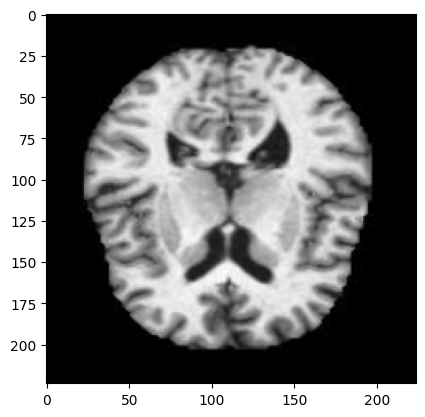

In [ ]:
plt.imshow(X_train[0],cmap='gray')

In [ ]:
Y_train[5000]

'VeryMildDemented'

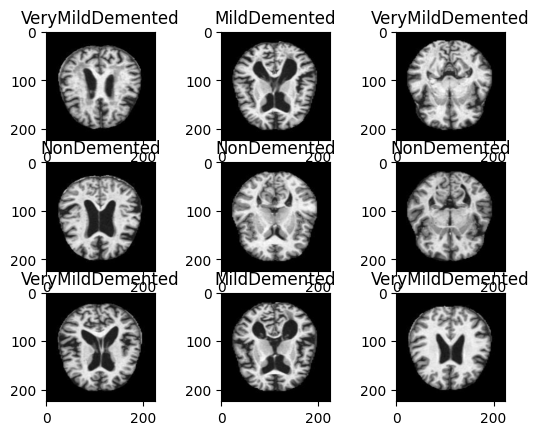

In [ ]:
import random
for i in range(0,9):
    j=random.randint(0,Y_train.shape[0])
    plt.subplot(330+1+i)
    plt.imshow(X_train[j].reshape(img_size,img_size),cmap=plt.get_cmap('gray'))
    plt.title(Y_train.iloc[j])

In [ ]:
# encode the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_train_encoded=le.fit_transform(Y_train)
Y_test_encoded=le.transform(Y_test)
Y_validation_encoded=le.transform(Y_validation)


In [ ]:
print(Y_validation.shape)
print(Y_test.shape)
print(Y_train.shape)

(256,)
(1024,)
(5120,)


# Creating the CNN




In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,DepthwiseConv2D,GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras import regularizers
def create_sequential(num_outputs):

      model=Sequential()

      model.add(Conv2D(48,(3,3),activation='relu',input_shape=(img_size,img_size,1),padding='same',name='conv1')) #f=3,p=1,s=1,c=32
      model.add(MaxPooling2D(2,2)) #f=2,s=2

      model.add(Conv2D(48,(3,3),activation='relu',padding='same',name='conv2')) #f=3,p=1,s=1,c=48
      # add batch normalisation
      model.add(BatchNormalization())
      # Add pooling layer
      model.add(MaxPooling2D(2,2)) #f=2,s=2
      model.add(Conv2D(96,(3,3),activation='relu',padding='same',name='conv3')) #f=3,p=1,s=1,c=64
      model.add(MaxPooling2D(2,2)) #f=2,s=2

      model.add(Conv2D(96,(3,3),activation='relu',padding='same',name='conv4')) #f=3,p=1,s=1,c=96
      model.add(BatchNormalization())
      model.add(MaxPooling2D(2,2)) #f=2,s=2
      model.add(Conv2D(128,(3,3),activation='relu',padding='same',name='conv5')) #f=3,p=1,s=1,c=128
      #Add pooling layer
      model.add(MaxPooling2D(2,2)) #f=2,s=2
      # model.add(Conv2D(256,(3,3),activation='relu',padding='same',name='conv6')) #f=3,p=1,s=1,c=256
      model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=1, activation='relu',name='depth_conv1'))
      model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=1, activation='relu',name='depth_conv2'))
      model.add(BatchNormalization())
      #Add pooling layer
      # model.add(MaxPooling2D(2,2)) #f=2,s=2
      # model.add(Flatten())
      model.add(GlobalAveragePooling2D())
      model.add(Dense(128,activation='relu',name='FC1'))
      model.add(Dropout(0.2))
      model.add(Dense(64,activation='relu',name='FC2'))
      # model.add(Dropout(0.2))
      model.add(Dense(num_outputs,activation='softmax',name='Output'))

      model.compile(optimizer=Adam(lr=1.5e-03),loss=categorical_crossentropy,metrics=['accuracy'])
      return model

# history=model.fit(X_denoise_train,y_train,epochs=15,batch_size=128,validation_data=(X_denoise_val,y_val))


In [ ]:
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 1.5e-03
    if epoch > 20:
        lr *= 0.5e-03
    elif epoch > 15:
        lr *= 1e-03
    elif epoch > 10:
        lr *= 1e-02
    elif epoch > 5:
        lr *= 1e-01
    print('Learning rate: ', lr)
    return lr




In [ ]:
y_train=to_categorical(Y_train_encoded)
y_test=to_categorical(Y_test_encoded)
y_val=to_categorical(Y_validation_encoded)
model=create_sequential(4)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 224, 224, 48)      480       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 48)      0         
 D)                                                              
                                                                 
 conv2 (Conv2D)              (None, 112, 112, 48)      20784     
                                                                 
 batch_normalization (Batch  (None, 112, 112, 48)      192       
 Normalization)                                                  
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 48)        0         
 g2D)                                                            
                                                        

# Sequential Model without CV

# Train for 20 Epochs

In [ ]:
history=model.fit(X_train,y_train,epochs=15,batch_size=50,validation_data=(X_validation,y_val),callbacks=[LearningRateScheduler(lr_schedule)])

Learning rate:  0.0015
Epoch 1/15
103/103 [==============================] - 26s 94ms/step - loss: 0.9299 - accuracy: 0.5770 - val_loss: 1.0308 - val_accuracy: 0.5430 - lr: 0.0015
Learning rate:  0.0015
Epoch 2/15
103/103 [==============================] - 9s 83ms/step - loss: 0.7879 - accuracy: 0.6268 - val_loss: 1.6275 - val_accuracy: 0.5117 - lr: 0.0015
Learning rate:  0.0015
Epoch 3/15
103/103 [==============================] - 9s 83ms/step - loss: 0.6652 - accuracy: 0.7072 - val_loss: 2.0117 - val_accuracy: 0.5156 - lr: 0.0015
Learning rate:  0.0015
Epoch 4/15
103/103 [==============================] - 9s 84ms/step - loss: 0.5090 - accuracy: 0.7908 - val_loss: 3.1150 - val_accuracy: 0.5352 - lr: 0.0015
Learning rate:  0.0015
Epoch 5/15
103/103 [==============================] - 9s 85ms/step - loss: 0.3736 - accuracy: 0.8484 - val_loss: 3.1088 - val_accuracy: 0.5586 - lr: 0.0015
Learning rate:  0.0015
Epoch 6/15
103/103 [==============================] - 9s 84ms/step - loss: 0.2593

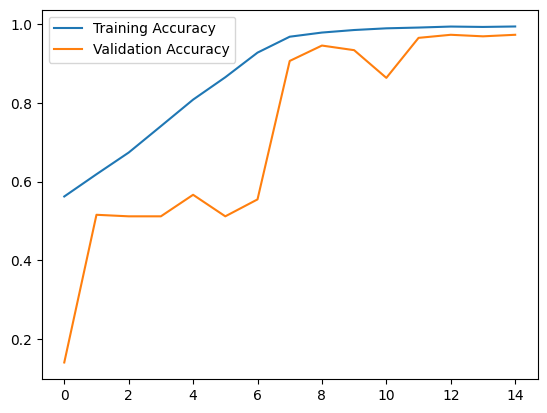

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

In [ ]:
label_encoded_predictions = np.argmax(model.predict(X_test), axis=1)
y_pred=le.inverse_transform(label_encoded_predictions)
y_pred

32/32 [==============================] - 1s 20ms/step


array(['VeryMildDemented', 'NonDemented', 'MildDemented', ...,
       'MildDemented', 'NonDemented', 'NonDemented'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score


# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute F1 score
f1 = f1_score(Y_test, y_pred, average='weighted')
print("F1 Score: ", f1)

# Compute recall
recall = recall_score(Y_test, y_pred, average='weighted')
print("Recall: ", recall)

# Compute accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ", accuracy)


Confusion Matrix:
[[154   0   5   6]
 [  0   8   0   0]
 [  0   0 497  15]
 [  4   0   4 331]]
F1 Score:  0.9668354760139987
Recall:  0.966796875
Accuracy:  0.966796875


In [ ]:
model_sequential=model

In [ ]:
model.save('model_sequential.h5')

In [ ]:
{"username":"karamarora","key":"fcb19a761620da28c2f4d6036416e24b"}
od.download("https://www.kaggle.com/datasets/madhucharan/alzheimersdisease5classdatasetadni")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: karamarora
Your Kaggle Key: ··········


100%|██████████| 16.9M/16.9M [00:01<00:00, 9.54MB/s]


In [ ]:
os.chdir('./alzheimersdisease5classdatasetadni/Alzheimers-ADNI/')

In [ ]:
def load_train_data_ADNI(img_size):


    df_temp=[] # create a list to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['AD','CN','EMCI','LMCI','MCI']
    i=0
    test_path=''

    for folder in os.listdir('train'):
        for filename in os.listdir(os.path.join('train',folder)):
            if filename.endswith(".jpg"):
                # try:
                    img=cv2.imread(os.path.join(f'train/{folder}', filename),cv2.IMREAD_GRAYSCALE)
                    df_temp.append(cv2.resize(img,(img_size,img_size)).reshape(img_size*img_size))
                    labels.append(classes[i])
        i=i+1

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_temp),labels

In [ ]:
def load_test_data_ADNI(img_size):


    df_temp=[] # create a list to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['AD','CN','EMCI','LMCI','MCI']
    i=0
    test_path=''

    for folder in os.listdir('test'):
        for filename in os.listdir(os.path.join('test',folder)):
            if filename.endswith(".jpg"):
                # try:
                    img=cv2.imread(os.path.join(f'test/{folder}', filename),cv2.IMREAD_GRAYSCALE)
                    df_temp.append(cv2.resize(img,(img_size,img_size)).reshape(img_size*img_size))
                    labels.append(classes[i])
        i=i+1


                # except:
                #     break

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_temp),labels

# Loading ADNI dataset

In [ ]:
# All_images=np.concatenate([train_images,test_images],axis=0)
img_size=224
train_data_ADNI,train_labels=load_train_data_ADNI(img_size)
# os.listdir('train')

In [ ]:
test_data_ADNI,test_labels=load_test_data_ADNI(img_size)

In [ ]:
test_data_ADNI.shape

(195, 50176)

In [ ]:
train_data_ADNI.shape

(1101, 50176)

In [ ]:
All_images=np.concatenate((train_data_ADNI,test_data_ADNI),axis=0)
all_labels=np.concatenate((train_labels,test_labels),axis=0)

In [ ]:
df=pd.DataFrame(All_images)
df['class']=all_labels
# df_train=pd.DataFrame(train_data_ADNI)
# df_train['class']=train_labels
# df_test=pd.DataFrame(test_data_ADNI)
# df_test['class']=test_labels

In [ ]:
# X_train,Y_train=df_train.iloc[:,:-1],df_train['class']

In [ ]:
df.shape

(1296, 50177)

In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,4,3,3,3,3,3,4
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,5,5,4,4,4,4,4,3,4,5,...,4,4,4,4,4,4,4,4,4,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,3,3,3,3,3,3,3,3,...,3,4,4,2,3,3,3,3,3,3


In [ ]:
# Divide X_test into validation and test
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
# Split the temporary set into the final training set and a validation set
X_test, X_validation, Y_test, Y_validation = train_test_split(X_temp, Y_temp, test_size=0.3, random_state=42, shuffle=True)
X_train=X_train.values.reshape(X_train.shape[0],img_size,img_size,1)
X_test=X_test.values.reshape(X_test.shape[0],img_size,img_size,1)
X_validation=X_validation.values.reshape(X_validation.shape[0],img_size,img_size,1)

In [ ]:
Y.unique()

array(['AD', 'CN', 'EMCI', 'LMCI', 'MCI'], dtype=object)

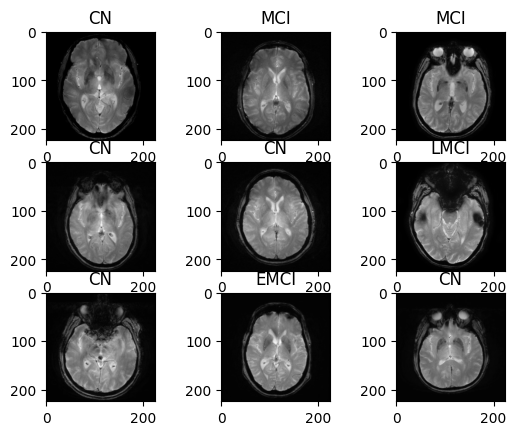

In [ ]:
import random
for i in range(0,9):
    j=random.randint(0,Y_train.shape[0])
    plt.subplot(330+1+i)
    plt.imshow(X_train[j].reshape(img_size,img_size),cmap=plt.get_cmap('gray'))
    plt.title(Y_train.iloc[j])

In [ ]:
# encode the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_train_encoded=le.fit_transform(Y_train)
Y_test_encoded=le.transform(Y_test)
Y_validation_encoded=le.transform(Y_validation)

In [ ]:
print(Y_train_encoded.shape)
print(Y_test_encoded.shape)
print(Y_validation_encoded.shape)

(1036,)
(182,)
(78,)


# Training on ADNI Dataset

In [ ]:
y_train=to_categorical(Y_train_encoded)
y_test=to_categorical(Y_test_encoded)
y_val=to_categorical(Y_validation_encoded)
model_ADNI=create_sequential(5)
model_ADNI.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2 (Conv2D)              (None, 112, 112, 48)      13872     
                                                                 
 batch_normalization_39 (Ba  (None, 112, 112, 48)      192       
 tchNormalization)                                               
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 56, 56, 48)        0         
 ng2D)                                                           
                                                     

In [ ]:
model_ADNI.compile(optimizer=Adam(lr=1.5e-03),loss=categorical_crossentropy,metrics=['accuracy'])

In [ ]:
history=model_ADNI.fit(X_train,y_train,epochs=25,batch_size=10,validation_data=(X_validation,y_val))

Epoch 1/25
104/104 [==============================] - 7s 26ms/step - loss: 1.4552 - accuracy: 0.4083 - val_loss: 1.5548 - val_accuracy: 0.3718
Epoch 2/25
104/104 [==============================] - 2s 16ms/step - loss: 1.4060 - accuracy: 0.4440 - val_loss: 1.5414 - val_accuracy: 0.3718
Epoch 3/25
104/104 [==============================] - 2s 16ms/step - loss: 1.3871 - accuracy: 0.4527 - val_loss: 1.6494 - val_accuracy: 0.3718
Epoch 4/25
104/104 [==============================] - 2s 16ms/step - loss: 1.3574 - accuracy: 0.4662 - val_loss: 1.5951 - val_accuracy: 0.3718
Epoch 5/25
104/104 [==============================] - 2s 16ms/step - loss: 1.3542 - accuracy: 0.4604 - val_loss: 1.6822 - val_accuracy: 0.3718
Epoch 6/25
104/104 [==============================] - 2s 17ms/step - loss: 1.3276 - accuracy: 0.4730 - val_loss: 1.5632 - val_accuracy: 0.3718
Epoch 7/25
104/104 [==============================] - 2s 17ms/step - loss: 1.3148 - accuracy: 0.4778 - val_loss: 1.6095 - val_accuracy: 0.3718

# Sequential Model on 10-fold CV

In [ ]:
X=df.iloc[:,:-1]
Y=df['class']
Y.shape

In [ ]:
from sklearn.model_selection import KFold
from keras.models import load_model
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()

kf=KFold(n_splits=10,shuffle=True,random_state=888)
kf.get_n_splits(X)
# y=to_categorical(le.transform(Y))
accs=[]
models=[]
i=1
for train_index,test_index in kf.split(X):

    X_train,X_temp=X.iloc[train_index,:],X.iloc[test_index,:]
    Y_train,y_temp=Y.iloc[train_index],Y.iloc[test_index]

    X_test,X_val,Y_test,Y_val=train_test_split(X_temp,y_temp,test_size=0.3,random_state=842)

    X_train=X_train.values.reshape(X_train.shape[0],img_size,img_size,1)
    X_test=X_test.values.reshape(X_test.shape[0],img_size,img_size,1)
    X_val=X_val.values.reshape(X_val.shape[0],img_size,img_size,1)

    y_train=to_categorical(le.fit_transform(Y_train))
    y_test=to_categorical(le.transform(Y_test))
    y_val=to_categorical(le.transform(Y_val))
    # model=load_model('model.h5')
    model=create_sequential()
    model.compile(optimizer=Adam(lr=2e-03),loss=categorical_crossentropy,metrics=['accuracy'])

    history=model.fit(X_train,y_train,epochs=15,batch_size=50,validation_data=(X_val,y_val),callbacks=[LearningRateScheduler(lr_schedule)])

    # model.save('model_5_CV.h5')
    acc= history.history['accuracy']
    val_acc=history.history['val_accuracy']

    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model {} accuracy'.format(i))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch ')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    i+=1
    models.append(model)


    accs.append(model.evaluate(X_test,y_test)[1])
print(f'Accuracies after 5-Fold CV: {np.mean(accs)}')

NameError: ignored

In [ ]:
model_no=np.argmax(accs)
models[model_no].save('model_5_CV.h5')